# Window Functions with pandas

## Work By - **RAVJOT SINGH**

E-Mail - ravjot313@gmail.com

Website - https://ravjot03.github.io/

LinkedIn - https://www.linkedin.com/in/ravjot03/

GitHub - https://github.com/Ravjot03

Medium - https://medium.com/@ravjot03

## Table of Contents

---
1 Rolling Window Functions

1.1 Importing the required libraries

1.2 Air Quality Data - NYC

1.21 Loading and Inspecting the data

1.22 Calculating a rolling average

1.23 90 & 360 day rolling means

1.24 Multiple Rolling metrics-1

1.25 Multiplt Rolling metrics-2

---

2 Rolling Expanding Functions

2.1 The basic idea

2.2 Google Data: For validation of cumsum() vs .diff()

2.3 Google-Apple Stock Prices Data: For running rate of return

2.31 Part-1

2.32 Getting the running min & max

2.33 Rolling Annual rate of return

2.34 Part-2

---

3 S&P500 Case Simulation

3.1 Creating a random walk

3.2 Generate random  numbers

3.3 Create a random price path

3.4 S&P500 Case Study

3.41 Generate random S&P500 returns

---

4 Relationships b/w time series: correlation

4.1 Annual return correlations

---

Conclusion

---

Window functions in pandas 

1.  Windows identify sub periods of your time series.
2.  Calculate metrics for sub periods inside the window.
3.  Create a new time series of metrics.
4.  Two Types of Windows -

      - Rolling : same size, sliding
      - Expanding : contain all prior values

##1. Rolling Window Functions 

###1.1 Importing the required libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

###1.2 Air Quality Data - NYC

####1.21 Loading and Inspecting the data

In [ ]:
nyc = pd.read_csv('ozone_nyc.csv', parse_dates=['date'], index_col='date')
nyc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6291 entries, 2000-01-01 to 2017-03-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   6167 non-null   float64
dtypes: float64(1)
memory usage: 98.3 KB


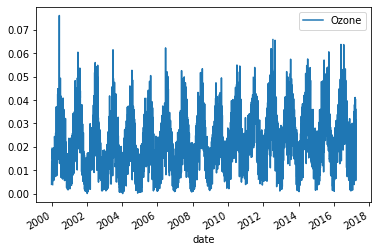

In [ ]:
nyc.plot()
plt.show()

####1.22 Calculating a rolling average

In [ ]:
nyc1 = nyc.rolling(window=30).mean() # window=30 => 30 business days
nyc1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6291 entries, 2000-01-01 to 2017-03-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   4992 non-null   float64
dtypes: float64(1)
memory usage: 98.3 KB


In [ ]:
nyc2 = nyc.rolling(window='30D').mean()  #window='30D' => 30 calender days
nyc2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6291 entries, 2000-01-01 to 2017-03-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   6291 non-null   float64
dtypes: float64(1)
memory usage: 98.3 KB


####1.23 90 & 360 day rolling means

**METHOD - 1**

In [ ]:
nyc['90d'] = nyc.Ozone.rolling(window='90D').mean()
nyc['360d'] = nyc.Ozone.rolling(window='360D').mean()

In [ ]:
nyc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6291 entries, 2000-01-01 to 2017-03-31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   6167 non-null   float64
 1   90d     6291 non-null   float64
 2   360d    6291 non-null   float64
dtypes: float64(3)
memory usage: 196.6 KB


Plotting the data

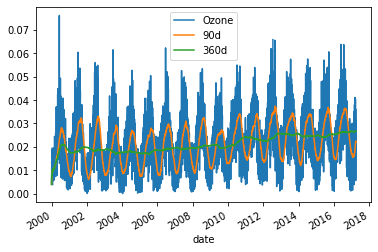

In [ ]:
nyc.plot()
plt.show()

Slicing data from year 2010 onwards and then plotting

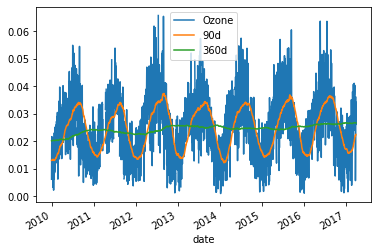

In [ ]:
nyc.loc['2010':].plot()
plt.show()

**METHOD - 2**

In [ ]:
nyc = pd.read_csv('ozone_nyc.csv', parse_dates=['date'], index_col='date')
nyc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6291 entries, 2000-01-01 to 2017-03-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   6167 non-null   float64
dtypes: float64(1)
memory usage: 98.3 KB


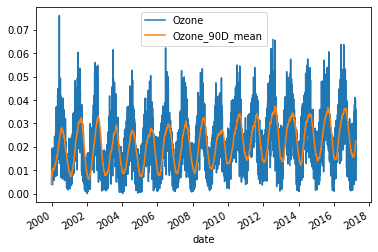

In [ ]:
r90 = nyc.rolling(window='90D').mean()
nyc.join(r90.add_suffix('_90D_mean')).plot()

`.join` -- concatenate Series or DataFrame along `axis=1`

In [ ]:
nyc['mean_90'] = r90

In [ ]:
nyc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6291 entries, 2000-01-01 to 2017-03-31
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    6167 non-null   float64
 1   mean_90  6291 non-null   float64
dtypes: float64(2)
memory usage: 147.4 KB


In [ ]:
r360 = nyc.Ozone.rolling(window='360D').mean()
nyc['mean_360'] = r360

In [ ]:
nyc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6291 entries, 2000-01-01 to 2017-03-31
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Ozone     6167 non-null   float64
 1   mean_90   6291 non-null   float64
 2   mean_360  6291 non-null   float64
dtypes: float64(3)
memory usage: 196.6 KB


Plotting the data

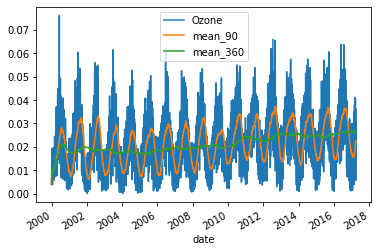

In [ ]:
nyc.plot()
plt.show()

####1.24 Multiple Rolling metrics - 1

Loading the Air Quality data

In [ ]:
nyc = pd.read_csv('ozone_nyc.csv', parse_dates=['date'], index_col='date')
nyc.dropna(axis=0, inplace=True) ##Dropping the missing values from the data

Applying `.agg()` to calculate `mean` and `std` .

In [ ]:
multi_stats = nyc.Ozone.rolling(window=360).agg(['mean', 'std'])

In [ ]:
stats = nyc.join(multi_stats)
stats.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6167 entries, 2000-01-01 to 2017-03-31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   6167 non-null   float64
 1   mean    5808 non-null   float64
 2   std     5808 non-null   float64
dtypes: float64(3)
memory usage: 352.7 KB


Plotting the data

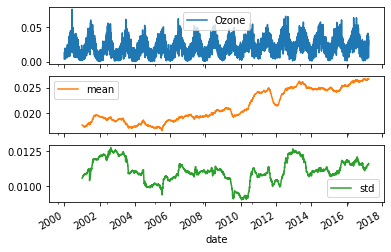

In [ ]:
stats.plot(subplots=True)
plt.show()

####1.25 Multiple Rolling metrics-2

Loading and Inspecting the data

In [ ]:
nyc = pd.read_csv('ozone_nyc.csv', parse_dates=['date'], index_col='date')
nyc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6291 entries, 2000-01-01 to 2017-03-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   6167 non-null   float64
dtypes: float64(1)
memory usage: 98.3 KB


Resampling data to frequency alias `daily` and interpolating the missing values.

In [ ]:
nyc = nyc.resample('D').interpolate()
nyc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6300 entries, 2000-01-01 to 2017-03-31
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   6300 non-null   float64
dtypes: float64(1)
memory usage: 98.4 KB


Creating the rolling window

In [ ]:
rolling = nyc.Ozone.rolling(window=360)

Inserting the rolling quantiles

In [ ]:
nyc['q10'] = rolling.quantile(0.1)
nyc['q50'] = rolling.quantile(0.5)
nyc['q90'] = rolling.quantile(0.9)

In [ ]:
nyc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6300 entries, 2000-01-01 to 2017-03-31
Freq: D
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   6300 non-null   float64
 1   q10     5941 non-null   float64
 2   q50     5941 non-null   float64
 3   q90     5941 non-null   float64
dtypes: float64(4)
memory usage: 246.1 KB


Plotting the data

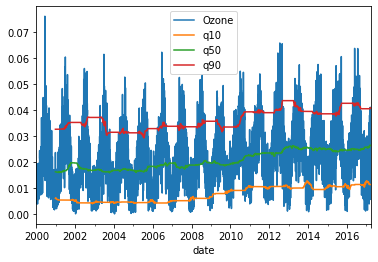

In [ ]:
nyc.plot()
plt.show()

##Rolling Expanding Functions

###2.1 The basic idea

In [ ]:
df = pd.DataFrame({'data': range(5)})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   data    5 non-null      int64
dtypes: int64(1)
memory usage: 168.0 bytes


In [ ]:
df['expanding_sum'] = df.data.expanding().sum()
df['cumulative_sum'] = df.data.cumsum()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   data            5 non-null      int64  
 1   expanding_sum   5 non-null      float64
 2   cumulative_sum  5 non-null      int64  
dtypes: float64(1), int64(2)
memory usage: 248.0 bytes


In [ ]:
df

,data,expanding_sum,cumulative_sum
0,0,0.0,0
1,1,1.0,1
2,2,3.0,3
3,3,6.0,6
4,4,10.0,10


###2.2 Google Data - For validation of cumsum() vs .diff()

In [ ]:
google = pd.read_csv('google.csv', parse_dates=['Date'], index_col='Date')
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1094 entries, 2014-01-02 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   756 non-null    float64
dtypes: float64(1)
memory usage: 17.1 KB


In [ ]:
differ = google.diff().dropna()
differ.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 594 entries, 2014-01-03 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   594 non-null    float64
dtypes: float64(1)
memory usage: 9.3 KB


In [ ]:
# Select start price
start_price = google.first('D')

In [ ]:
# Calculate cumulative sum
cumulative_sum = start_price.append(differ).cumsum()

In [ ]:
# Validate cumulative sum equals data
print(google.equals(cumulative_sum))

False


###2.3 Google-Apple Stock Prices Data - For Running rate of return

####2.31 Part-1

Loading and Inspecting the data

In [ ]:
df = pd.read_csv('apple_google.csv', parse_dates=['Date'], index_col='Date')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1864 entries, 2010-01-04 to 2017-05-31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1624 non-null   float64
 1   GOOG    1864 non-null   float64
dtypes: float64(2)
memory usage: 43.7 KB


In [ ]:
investment = 1000 #my investment

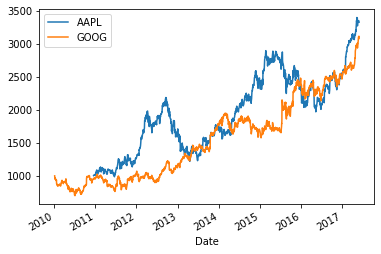

In [ ]:
#Calculating daily returns
returns = df.pct_change()

#Calculating cumulative returns
returns_plus_one = returns.add(1)

cumulative_return = returns_plus_one.cumprod()

#Calculating and plotting Investment returns
cumulative_return.mul(investment).plot()

plt.show()

####2.32 Getting the Running Min & Max

Loading and Inspecting the data

In [ ]:
df = pd.read_csv('apple_google.csv', parse_dates=['Date'], index_col='Date')
df = df.drop(['AAPL'], axis=1) #Dropping Apple Stock Prices column from the data
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1864 entries, 2010-01-04 to 2017-05-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GOOG    1864 non-null   float64
dtypes: float64(1)
memory usage: 29.1 KB


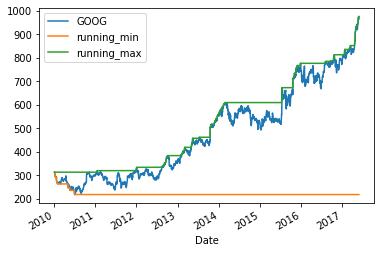

In [ ]:
df['running_min'] = df.GOOG.expanding().min()
df['running_max'] = df.GOOG.expanding().max()
df.plot()
plt.show()

####2.33 Rolling Annual Rate of Return

Loading and Inspecting the data

In [ ]:
df = pd.read_csv('apple_google.csv', parse_dates=['Date'], index_col='Date')
df = df.drop(['AAPL'], axis=1) #Dropping Apple Stock Prices column from the data
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1864 entries, 2010-01-04 to 2017-05-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GOOG    1864 non-null   float64
dtypes: float64(1)
memory usage: 29.1 KB


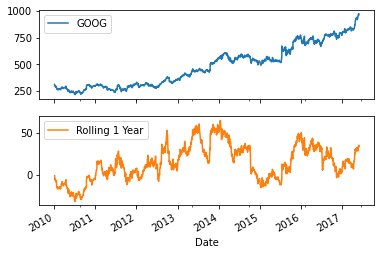

In [ ]:
def multi_period_return(period_returns):
  return np.prod(period_returns + 1) - 1

pr = df.GOOG.pct_change() #period return
r = pr.rolling('360D').apply(multi_period_return) #360 calender days rolling period
df['Rolling 1 Year'] = r.mul(100)
df.plot(subplots=True) #Plotting the data
plt.show()

####2.34 Part-2

Loading and Inspecting the data

In [ ]:
df = pd.read_csv('apple_google.csv', parse_dates=['Date'], index_col='Date')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1864 entries, 2010-01-04 to 2017-05-31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1624 non-null   float64
 1   GOOG    1864 non-null   float64
dtypes: float64(2)
memory usage: 43.7 KB


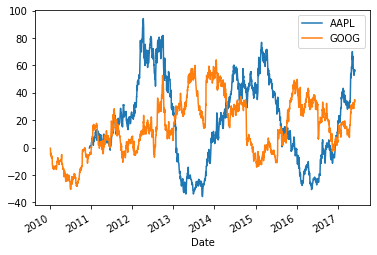

In [ ]:
# Import numpy
import numpy as np

# Define a multi_period_return function
def multi_period_return(period_returns):
    return np.prod(period_returns + 1) - 1
    
# Calculate daily returns
daily_returns = df.pct_change()

# Calculate rolling_annual_returns
rolling_annual_returns = daily_returns.rolling('360D').apply(multi_period_return)

# Plot rolling_annual_returns
rolling_annual_returns.mul(100).plot()
plt.show()

##S&P500 Case Simulation

###3.1 Creating a random walk

In [ ]:
from numpy.random import normal, seed
from scipy.stats import norm

In [ ]:
seed(42)

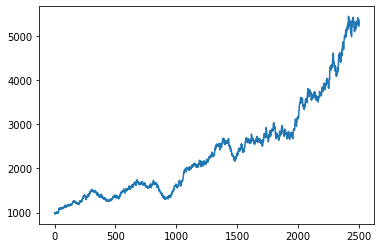

In [ ]:
# Create random_walk
random_walk = normal(loc=.001, scale=0.01, size=2500)

# Convert random_walk to pd.series
random_walk = pd.Series(random_walk)

# Create random_prices
random_prices = random_walk.add(1).cumprod()

# Plot random_prices here
random_prices.mul(1000).plot()
plt.show()

###3.2 Generate random numbers



/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


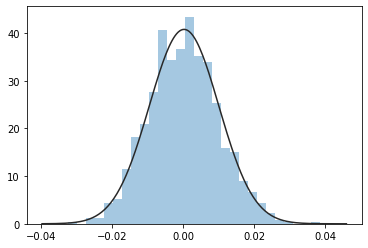

In [ ]:
from numpy.random import normal, seed
from scipy.stats import norm
import seaborn as sns

seed(42)

random_returns = normal(loc=0, scale=0.01, size=1000)

sns.distplot(random_returns, fit=norm, kde=False)
plt.show()

###3.3 Create a random price path

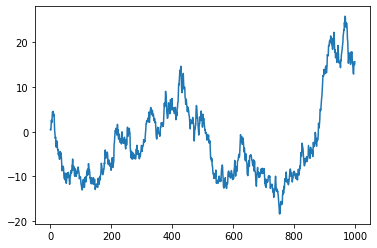

In [ ]:
return_series = pd.Series(random_returns)

random_prices = return_series.add(1).cumprod().sub(1)

random_prices.mul(100).plot()

###3.4 S&P500 Case Study

Loading and Inspecting the data

In [ ]:
sp500 = pd.read_csv('sp500.csv', parse_dates=['date'], index_col='date')
sp500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2395 entries, 2007-06-29 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SP500   2395 non-null   float64
dtypes: float64(1)
memory usage: 37.4 KB


In [ ]:
sp500['returns'] = sp500.SP500.pct_change() #calculating period returns
sp500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2395 entries, 2007-06-29 to 2016-12-30
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SP500    2395 non-null   float64
 1   returns  2394 non-null   float64
dtypes: float64(2)
memory usage: 56.1 KB


S&P500 Prices & Returns

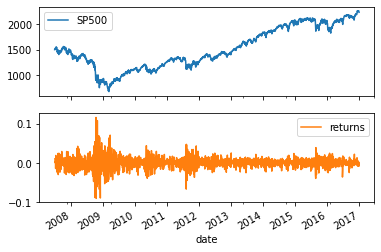

In [ ]:
sp500.plot(subplots=True)
plt.show()

S&P500 return distribution

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


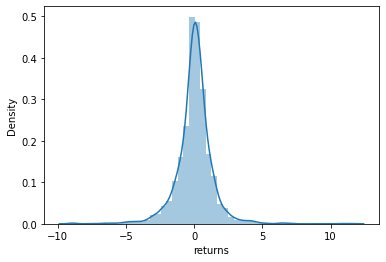

In [ ]:
sns.distplot(sp500.returns.dropna().mul(100)).plot()
plt.show()

####Generate random S&P500 returns

In [ ]:
from numpy.random import choice

sample = sp500.returns.dropna()
n_obs = sp500.returns.count()

random_walk = choice(sample, size=n_obs)

random_walk = pd.Series(random_walk, index=sample.index)

random_walk.head()

date
2007-07-02    0.007856
2007-07-03   -0.002457
2007-07-05   -0.008810
2007-07-06    0.008341
2007-07-09   -0.052816
dtype: float64

Random S&P500 prices

In [ ]:
start = sp500.SP500.first('D')
start

date
2007-06-29    1503.35
Name: SP500, dtype: float64

In [ ]:
sp500_random = start.append(random_walk.add(1))

sp500_random.head()

date
2007-06-29    1503.350000
2007-07-02       1.007856
2007-07-03       0.997543
2007-07-05       0.991190
2007-07-06       1.008341
dtype: float64

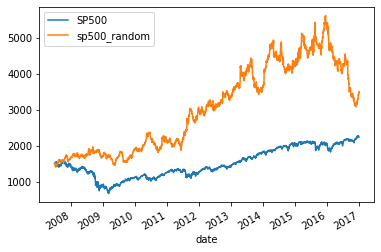

In [ ]:
sp500['sp500_random'] = sp500_random.cumprod()

sp500[['SP500', 'sp500_random']].plot()
plt.show()

##Relationships b/w time series: correlation

###4.1 Annual Return Correlations

Loading and Inspecting the data

In [ ]:
stocks = pd.read_csv('5_stocks.csv', parse_dates=['Date'], index_col='Date')
stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4001 entries, 2001-07-05 to 2017-05-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    4000 non-null   float64
 1   AMZN    4000 non-null   float64
 2   IBM     4000 non-null   float64
 3   WMT     4000 non-null   float64
 4   XOM     4000 non-null   float64
dtypes: float64(5)
memory usage: 187.5 KB


In [ ]:
annual_prices = stocks.resample('A').last() #calculating year-end prices
annual_prices

,AAPL,AMZN,IBM,WMT,XOM
Date,,,,,
2001-12-31,1.56,10.82,120.96,57.55,39.30
2002-12-31,1.02,18.89,77.50,50.51,34.94
2003-12-31,1.53,52.62,92.68,53.05,41.00
2004-12-31,4.60,44.29,98.58,52.82,51.26
2005-12-31,10.27,47.15,82.20,46.80,56.17
2006-12-31,12.12,39.46,97.15,46.18,76.63
2007-12-31,28.30,92.64,108.10,47.53,93.69
2008-12-31,12.19,51.28,84.16,56.06,79.83
2009-12-31,30.10,134.52,130.90,53.45,68.19


In [ ]:
annual_returns = annual_prices.pct_change() #calculating annual returns
annual_returns

,AAPL,AMZN,IBM,WMT,XOM
Date,,,,,
2001-12-31,NaN,NaN,NaN,NaN,NaN
2002-12-31,-0.346154,0.745841,-0.359292,-0.122328,-0.110941
2003-12-31,0.500000,1.785601,0.195871,0.050287,0.173440
2004-12-31,2.006536,-0.158305,0.063660,-0.004336,0.250244
2005-12-31,1.232609,0.064574,-0.166159,-0.113972,0.095786
2006-12-31,0.180136,-0.163097,0.181873,-0.013248,0.364251
2007-12-31,1.334983,1.347694,0.112712,0.029233,0.222628
2008-12-31,-0.569258,-0.446459,-0.221462,0.179466,-0.147935
2009-12-31,1.469237,1.623245,0.555371,-0.046557,-0.145810


In [ ]:
#calculating and printing the correlation matrix
correlations = annual_returns.corr()
correlations

,AAPL,AMZN,IBM,WMT,XOM
AAPL,1.000000,0.208731,0.460568,-0.183553,0.336413
AMZN,0.208731,1.000000,0.346407,-0.367620,-0.133965
IBM,0.460568,0.346407,1.000000,0.155445,0.367253
WMT,-0.183553,-0.367620,0.155445,1.000000,0.178833
XOM,0.336413,-0.133965,0.367253,0.178833,1.000000


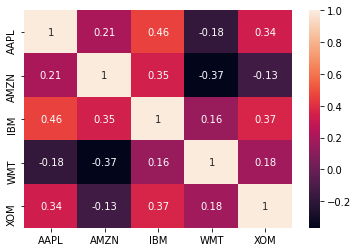

In [ ]:
#Visualizing the correlations as a heatmap using Seaborn library
sns.heatmap(correlations, annot=True)
plt.show()

## Conclusion

In this jupyter notebook, we have learnt how to use window function and to calculate time series metrics for both rolling and expanding functions.